In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv(r'D:\CSE Code\Jupyter Notebook\bangla_spam.csv');

In [3]:
df.sample(5)

,type,text
1955,ham,কাশির জন্য সরিষাটা ভালো না?
2350,spam,যখন আছেন budget deal এর সাথে অর্ডার করে ফেলুন ...
653,ham,“১৫ হতে ২১ জুন ২০২২ সারাদেশে জনশুমারি ও গৃহগণন...
972,spam,আপনি ডাটা বোনাস পেয়েছেন। আরো স্পেশাল অফার পেতে...
680,ham,আগামী ২৩ জুলাই ২০২২ তারিখ রোজ শনিবার সকাল ১১ঃ০...


In [4]:
df.shape


(2602, 2)

## Data Cleaning

In [5]:
#to show the information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    2602 non-null   object
 1   text    2602 non-null   object
dtypes: object(2)
memory usage: 40.8+ KB


In [6]:
#chnaging column name type to target
df.rename(columns={'type': 'target'}, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'target' column
df['target'] = encoder.fit_transform(df['target'])

# Display the updated DataFrame
print(df.head())

   target                                               text
0       1  এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...
1       1  আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...
2       0  ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...
3       1  নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...
4       0  নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...


In [8]:
encoder.fit_transform(df['target'])

array([1, 1, 0, ..., 1, 1, 1], shape=(2602,))

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [11]:
df.head()

,target,text
0,1,এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...
1,1,আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...
2,0,ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...
3,1,নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...
4,0,নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...


In [12]:
#missing values check
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#checking duplicate values
df.duplicated().sum()

np.int64(25)

In [14]:
#removing duplicat values
df=df.drop_duplicates(keep='first')

In [15]:
#checking duplicate values
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(2577, 2)

## EDA (Exploratory Data Analysis)


In [17]:
df.head()

,target,text
0,1,এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...
1,1,আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...
2,0,ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...
3,1,নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...
4,0,নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...


In [18]:
#amount of spam and ham
df['target'].value_counts()

target
1    1399
0    1178
Name: count, dtype: int64

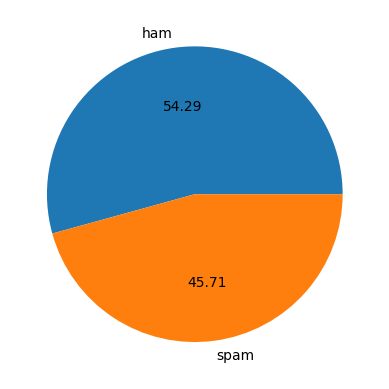

In [19]:
#spam and ham amount graph
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
#installing and importing 'Natural Language Toolkit'
!pip install nltk
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#number of charecters in a msg
df['text'].apply(len)

0        55
1        60
2       131
3        57
4        75
       ... 
2597     48
2598     49
2599     47
2600     57
2601     62
Name: text, Length: 2577, dtype: int64

In [23]:
df.loc[:, 'num_characters'] = df['text'].apply(len)
df = df.copy()
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,1,এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...,55
1,1,আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...,60
2,0,ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...,131
3,1,নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...,57
4,0,নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...,75


In [25]:
df.head()

,target,text,num_characters
0,1,এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...,55
1,1,আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...,60
2,0,ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...,131
3,1,নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...,57
4,0,নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...,75


In [26]:
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df.loc[:, 'num_characters'] = df['text'].apply(len)
df = df.copy()
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,1,এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...,55
1,1,আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...,60
2,0,ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...,131
3,1,নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...,57
4,0,নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...,75


In [29]:
#adding 2 more columns as num_words and num_sentences to store word numbers and sentence number
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Ensure the necessary NLTK data is downloaded
nltk.download('punkt')

df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_sentences'] = df['text'].apply(lambda x: len(x.split('.')))
# Display the updated DataFrame
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,num_characters,num_words,num_sentences
0,1,এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...,55,9,1
1,1,আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...,60,10,1
2,0,ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...,131,16,4
3,1,নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...,57,10,1
4,0,নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...,75,12,1


In [30]:
#discribtion of num_characters,num_words,num_sentences
df[['num_characters','num_words','num_sentences']].describe

<bound method NDFrame.describe of       num_characters  num_words  num_sentences
0                 55          9              1
1                 60         10              1
2                131         16              4
3                 57         10              1
4                 75         12              1
...              ...        ...            ...
2597              48          8              1
2598              49          9              1
2599              47          8              1
2600              57          8              1
2601              62         11              1

[2577 rows x 3 columns]>

In [31]:
#describtion for ham sms
df[df['target']==0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1178.000000,1178.000000,1178.000000
mean,100.187606,14.899830,1.591681
std,82.091602,12.928408,1.312834
min,6.000000,1.000000,1.000000
25%,42.250000,7.000000,1.000000
50%,93.000000,14.000000,1.000000
75%,138.750000,20.000000,1.000000
max,1357.000000,230.000000,10.000000


In [32]:
#describtion for spam sms
df[df['target']==1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1399.000000,1399.000000,1399.000000
mean,82.793424,12.242316,1.434596
std,87.943014,13.350852,0.802253
min,6.000000,1.000000,1.000000
25%,45.500000,7.000000,1.000000
50%,68.000000,9.000000,1.000000
75%,101.000000,14.000000,2.000000
max,1911.000000,296.000000,10.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

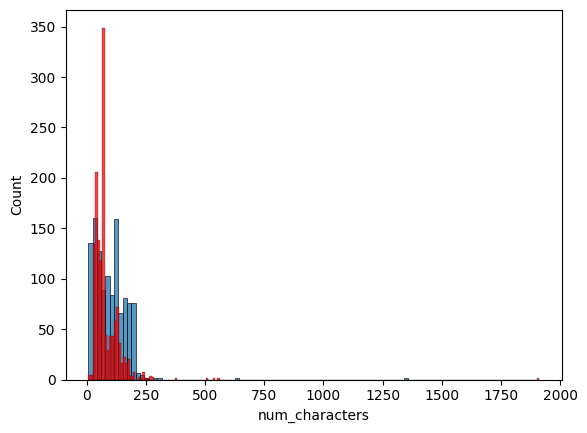

In [34]:
#histogram for spam and ham sms
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

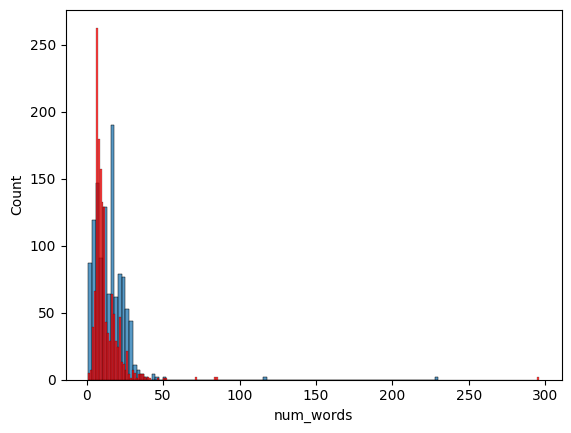

In [35]:
#histogram for spam and ham sms in term of words
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

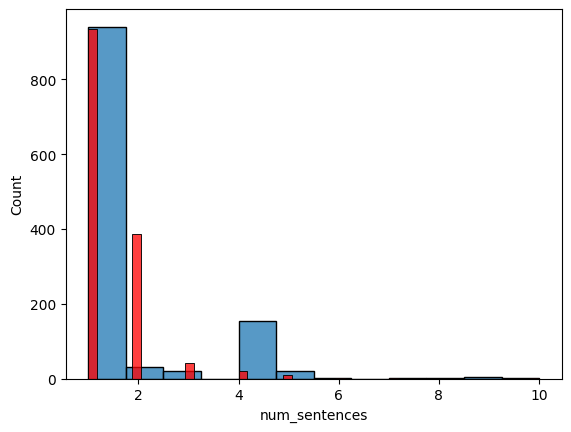

In [36]:
#histogram for spam and ham sms
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

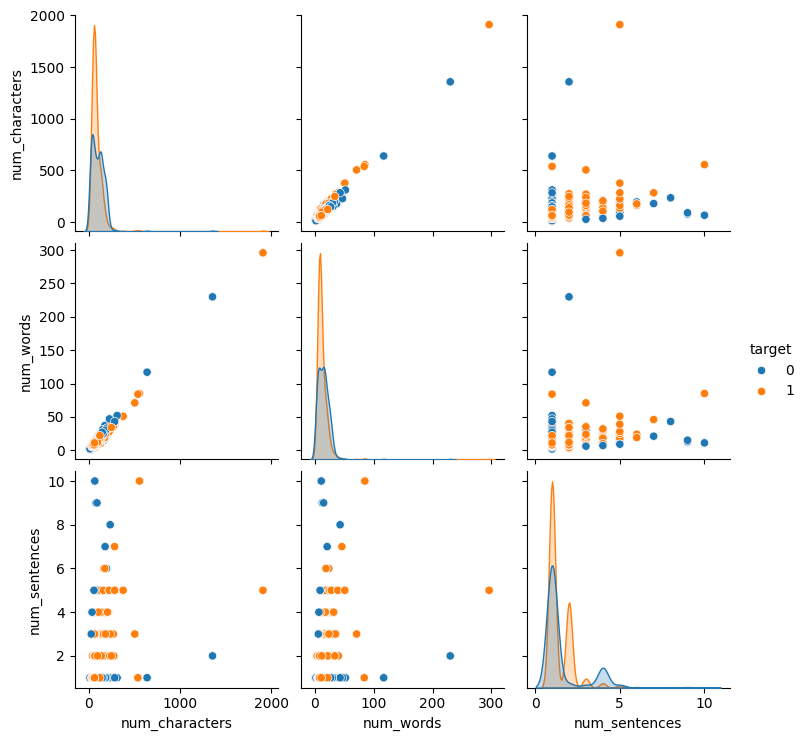

In [37]:
sns.pairplot(df,hue='target')

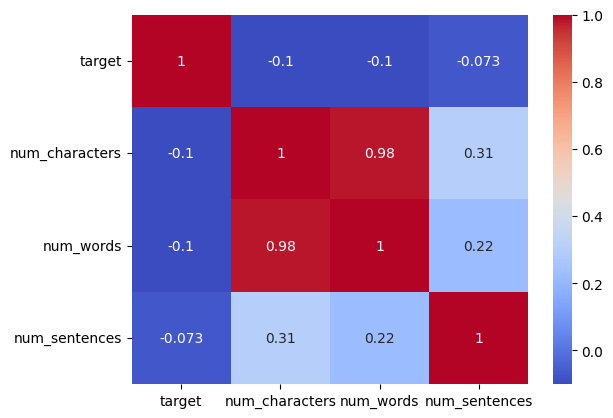

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation and plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Data Preprocessing

In [42]:
#tokenize every word
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    return text

In [43]:
pip install bangla-stemmer

Note: you may need to restart the kernel to use updated packages.


In [44]:
transform_text('এই মেসেজটি শেয়ার করুন ')

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\mdsha/nltk_data'
    - 'C:\\Users\\mdsha\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'C:\\Users\\mdsha\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'C:\\Users\\mdsha\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\mdsha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [45]:
import re
import nltk
nltk.download('punkt')

def transform_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)  
    
    # Clean each word (remove special characters, keep Bangla, English, and numbers)
    clean_words = [re.sub(r'[^a-zA-Z0-9\u0980-\u09FF]', '', word) for word in words]
    
    # Remove empty strings after cleaning
    clean_words = [word for word in clean_words if word]  
    
    return clean_words  # Returning tokenized words as a list

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
# Test the function
print(transform_text('আজকের স্পেশাল অফার! ফ্রোজেন ফুডে ১৫ % ডিসকাউন্ট! '))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\mdsha/nltk_data'
    - 'C:\\Users\\mdsha\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'C:\\Users\\mdsha\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'C:\\Users\\mdsha\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\mdsha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [47]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get Bangla stopwords
bangla_stopwords = stopwords.words('bengali')  # Use 'bengali' instead of 'bangla'

print(bangla_stopwords[:10])  # Show first 10 stopwords

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
pip install bangla-stemmer

Note: you may need to restart the kernel to use updated packages.


In [50]:
import re

class BanglaStemmer:
    def __init__(self):
        # Common Bengali suffixes to remove
        self.suffixes = ['গুলি', 'কে', 'দের', 'তে', 'র', 'রা', 'বার', 'টি', 'গুলো', 'এর', 'য়ের', 'ে', 'ন', 'রা', 'তে', 'ুন']
    
    def stem(self, word):
        for suffix in self.suffixes:
            if word.endswith(suffix):
                return word[:-len(suffix)]  # Remove the suffix
        return word  # Return the word as is if no suffix is found
    
    def stem_sentence(self, sentence):
        words = re.findall(r'\b[\u0980-\u09FF]+\b', sentence)  # Extract Bengali words only
        stemmed_words = [self.stem(word) for word in words]
        return ' '.join(stemmed_words)

# Example usage
sentence = 'ঘরে বসে গ্রাফিক ডিজাইন কাজ করুন!'
stemmer = BanglaStemmer()
stemmed_sentence = stemmer.stem_sentence(sentence)
print(stemmed_sentence)


ঘ বস গ্রাফিক ডিজাই কাজ করু


In [51]:
# Example usage 2
sentence = 'আপনার প্রেমিকাকে পটানোর টিপস আমরা প্রোভাইড করবো'
stemmer = BanglaStemmer()
stemmed_sentence = stemmer.stem_sentence(sentence)
print(stemmed_sentence)  

আপনা প্রেমিকাক পটানো টিপস আম প্রোভাইড করব


In [52]:
#adding new column named transformed_text'
stemmer = BanglaStemmer()
df['transformed_text'] = df['text'].apply(stemmer.stem_sentence)

In [53]:
print(df)

      target                                               text  \
0          1  এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...   
1          1  আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...   
2          0  ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...   
3          1  নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...   
4          0  নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...   
...      ...                                                ...   
2597       1   প্রতিদিন ১০০ টাকা জিততে চান? এখনই অংশগ্রহণ করুন!   
2598       1  মোবাইল অ্যাপ ডাউনলোড করুন এবং ৫০০ টাকা বোনাস পান!   
2599       1    নতুন গ্রাহকদের জন্য বিশেষ অফার, আজই উপভোগ করুন!   
2600       1  আপনার অ্যাকাউন্ট আপগ্রেড করুন এবং এক্সক্লুসিভ ...   
2601       1  বিশেষ ছাড়! ২৪ ঘন্টার মধ্যে অর্ডার করুন এবং ৩০...   

      num_characters  num_words  num_sentences  \
0                 55          9              1   
1                 60         10              1   
2                131         16              

In [54]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [55]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [56]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

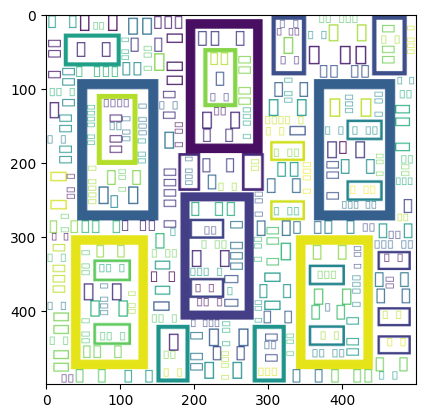

In [57]:
plt.imshow(spam_wc)

In [58]:
bengali_font_path = "D:/CSE Code/vrinda.ttf" 

In [59]:
import os

bengali_font_path = "D:/CSE Code/vrinda.ttf"  # Change this if needed

if os.path.exists(bengali_font_path):
    print("Font file found ✅")
else:
    print("Font file NOT found ❌ - Check the path!")


Font file found ✅


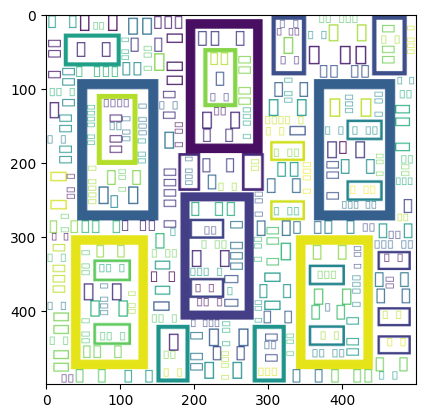

In [60]:
plt.imshow(spam_wc)

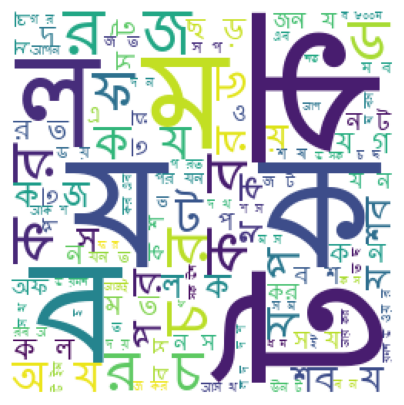

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Correct Font Path
bengali_font_path = "D:/CSE Code/vrinda.ttf"  # Change based on your system

# Check if font exists
if not os.path.exists(bengali_font_path):
    raise FileNotFoundError(f"Font not found: {bengali_font_path}")

# Create WordCloud with Bengali font
wc = WordCloud(
    width=250, height=250, 
    min_font_size=10, 
    background_color='white',
    font_path=bengali_font_path
)

# Generate WordCloud for Bengali text
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

# Display the WordCloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(spam_wc)
plt.axis("off")
plt.show()


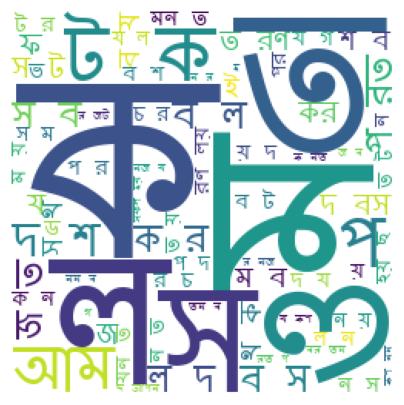

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Correct Font Path
bengali_font_path = "D:/CSE Code/vrinda.ttf"  # Change based on your system

# Check if font exists
if not os.path.exists(bengali_font_path):
    raise FileNotFoundError(f"Font not found: {bengali_font_path}")

# Create WordCloud with Bengali font
wc = WordCloud(
    width=250, height=250, 
    min_font_size=10, 
    background_color='white',
    font_path=bengali_font_path
)

# Generate WordCloud for Bengali text
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

# Display the WordCloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(ham_wc)
plt.axis("off")
plt.show()

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,এই মেসেজটি শেয়ার করুন এবং জিতে নিন আকর্ষণীয় ...,55,9,1,এই মেসেজট শেয়া করু এব জিত নি আকর্ষণীয পুরস্কা
1,1,আপনার বন্ধুদের রেফার করুন এবং প্রতি রেফারেলে ২...,60,10,1,আপনা বন্ধু রেফা করু এব প্রত রেফারেল ২০০ টাক জিতু
2,0,ট্রানজ্যাকশন নম্বর R234321.1554.640085 20 টাকা...,131,16,4,ট্রানজ্যাকশ নম্ব টাক রিচার্জট সফল হয়েছ আপনা বর...
3,1,নতুন অফার! সীমিত সময়ের জন্য পণ্যের উপর ৯০% পর...,57,10,1,নতু অফা সীমিত সময়ে জন্য পণ্যে উপ ৯০ পর্যন্ত ছাড
4,0,নববর্ষের শুভেচ্ছা!! আল্লাহ আপনার সকল কষ্ট দূর ...,75,12,1,নববর্ষে শুভেচ্ছ আল্লাহ আপনা সকল কষ্ট দূ ক আপনা...


In [64]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [65]:
len(spam_corpus)

16211

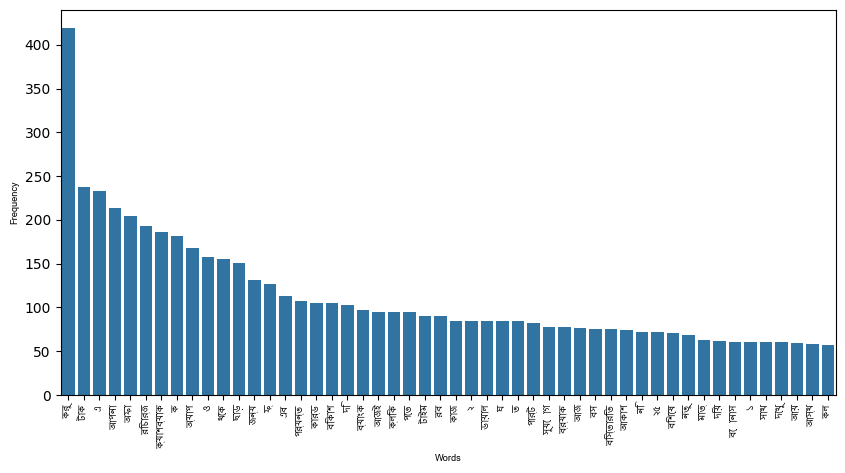

In [66]:
#showing top spam words in "transformed_text"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import matplotlib.font_manager as fm

# Load Bengali font (adjust path if necessary)
font_path = "D:/CSE Code/vrinda.ttf"  # Adjust if needed
bengali_font = fm.FontProperties(fname=font_path)

# Count most common words
spam_word_counts = Counter(spam_corpus).most_common(50)
df_spam_words = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=df_spam_words)

# Apply Bengali font
plt.xticks(rotation=90, fontproperties=bengali_font)
plt.xlabel("Words", fontproperties=bengali_font)
plt.ylabel("Frequency", fontproperties=bengali_font)

# Show plot
plt.show()


In [68]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

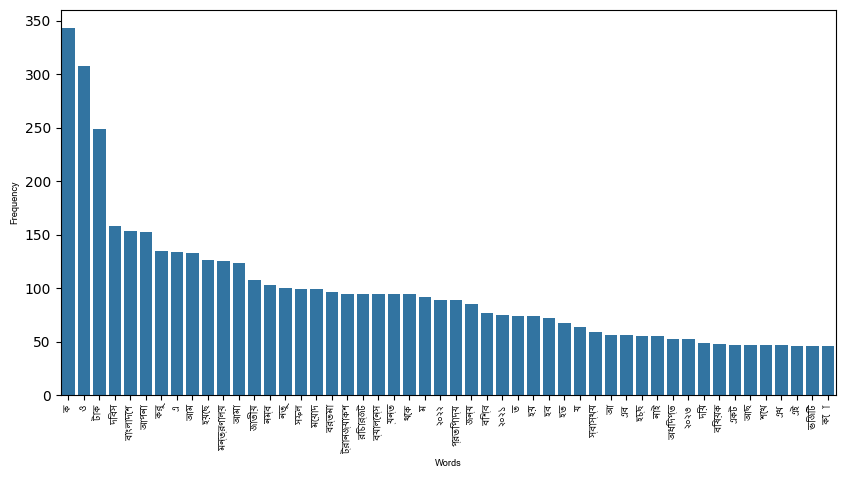

In [69]:
#showing top ham words in "transformed_text"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import matplotlib.font_manager as fm

# Load Bengali font (adjust path if necessary)
font_path = "D:/CSE Code/vrinda.ttf"  # Adjust if needed
bengali_font = fm.FontProperties(fname=font_path)

# Count most common words
ham_word_counts = Counter(ham_corpus).most_common(50)
df_ham_words = pd.DataFrame(ham_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=df_ham_words)

# Apply Bengali font
plt.xticks(rotation=90, fontproperties=bengali_font)
plt.xlabel("Words", fontproperties=bengali_font)
plt.ylabel("Frequency", fontproperties=bengali_font)

# Show plot
plt.show()

# Model Building

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Fixed spelling

# Initialize vectorizers
cv = CountVectorizer()        # For Bag-of-Words
tfidf = TfidfVectorizer()     # For TF-IDF

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
X.shape

(2577, 1457)

In [73]:
y = df['target'].values  # Assign target values to y

In [74]:
y

array([1, 1, 0, ..., 1, 1, 1], shape=(2577,))

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [79]:
#GaussianNB
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8701550387596899
[[173  55]
 [ 12 276]]
0.8338368580060423


In [80]:
#MultinomialNB
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9089147286821705
[[199  29]
 [ 18 270]]
0.903010033444816


In [81]:
#BernoulliNB
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8391472868217055
[[157  71]
 [ 12 276]]
0.7953890489913544


In [82]:
#tfidf --> MNB

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.linear_model import LogisticRegression  # Removed the dot
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier  # Removed space
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier

In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1') 
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)  
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [86]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [87]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [88]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8934108527131783, 0.911660777385159)

In [89]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.8934108527131783
Precision 0.911660777385159
For KN
Accuracy 0.751937984496124
Precision 0.9878048780487805
For NB
Accuracy 0.9089147286821705
Precision 0.903010033444816


C:\Users\mdsha\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mdsha\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\mdsha\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mdsha\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038

For DT
Accuracy 0.7267441860465116
Precision 0.6779661016949152
For LR
Accuracy 0.8875968992248062
Precision 0.9227941176470589
For RF
Accuracy 0.9418604651162791
Precision 0.954225352112676
For AdaBoost
Accuracy 0.75
Precision 0.7097625329815304
For BgC
Accuracy 0.9282945736434108
Precision 0.9530685920577617
For ETC
Accuracy 0.9554263565891473
Precision 0.9715302491103203
For GBDT
Accuracy 0.812015503875969
Precision 0.7800586510263929
For xgb
Accuracy 0.8953488372093024
Precision 0.9333333333333333


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [92]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.751938,0.987805
8,ETC,0.955426,0.971530
5,RF,0.941860,0.954225
7,BgC,0.928295,0.953069
10,xgb,0.895349,0.933333
4,LR,0.887597,0.922794
0,SVC,0.893411,0.911661
2,NB,0.908915,0.903010
9,GBDT,0.812016,0.780059
6,AdaBoost,0.750000,0.709763


In [96]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [97]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.751938
1,ETC,Accuracy,0.955426
2,RF,Accuracy,0.941860
3,BgC,Accuracy,0.928295
4,xgb,Accuracy,0.895349
5,LR,Accuracy,0.887597
6,SVC,Accuracy,0.893411
7,NB,Accuracy,0.908915
8,GBDT,Accuracy,0.812016
9,AdaBoost,Accuracy,0.750000


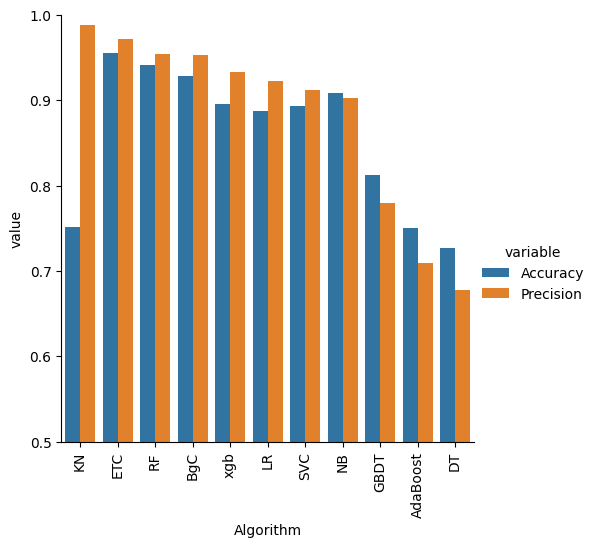

In [98]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#### model improve


In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [101]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [102]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [103]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [105]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.751938,0.987805,0.751938,0.987805,0.751938,0.987805,0.751938,0.987805
1,ETC,0.955426,0.971530,0.955426,0.971530,0.955426,0.971530,0.955426,0.971530
2,RF,0.941860,0.954225,0.941860,0.954225,0.941860,0.954225,0.941860,0.954225
3,BgC,0.928295,0.953069,0.928295,0.953069,0.928295,0.953069,0.928295,0.953069
4,xgb,0.895349,0.933333,0.895349,0.933333,0.895349,0.933333,0.895349,0.933333
5,LR,0.887597,0.922794,0.887597,0.922794,0.887597,0.922794,0.887597,0.922794
6,SVC,0.893411,0.911661,0.893411,0.911661,0.893411,0.911661,0.893411,0.911661
7,NB,0.908915,0.903010,0.908915,0.903010,0.908915,0.903010,0.908915,0.903010
8,GBDT,0.812016,0.780059,0.812016,0.780059,0.812016,0.780059,0.812016,0.780059
9,AdaBoost,0.750000,0.709763,0.750000,0.709763,0.750000,0.709763,0.750000,0.709763


In [111]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [110]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [109]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [116]:
# First fit the model with your training data
voting.fit(X_train, y_train)

# Then make predictions
y_pred = voting.predict(X_test)

# Now you can evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.9263565891472868
Precision: 0.9401408450704225


In [99]:
import pandas as pd  # First import pandas

# Create the DataFrame with your results
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  # Convert dict_keys to list
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

# If you're creating multiple DataFrames to merge later
temp_df_scaled = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores
}).sort_values('Precision_scaling', ascending=False)

temp_df_chars = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
}).sort_values('Precision_num_chars', ascending=False)

# To merge (assuming performance_df exists)
# new_df = performance_df.merge(temp_df, on='Algorithm')
# new_df_scaled = new_df.merge(temp_df_scaled, on='Algorithm')